<a href="https://colab.research.google.com/github/spatidar2109/ML_Learing/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[135   3]
 [  8  64]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       138
           1       0.96      0.89      0.92        72

    accuracy                           0.95       210
   macro avg       0.95      0.93      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


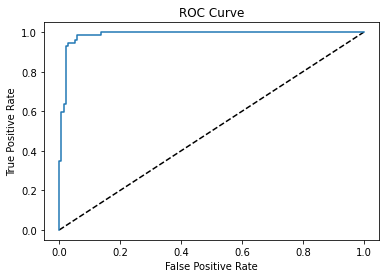

Clump = 0.047020568961298956
UniCell_Size = 0.322396688953662
Uni_CellShape = 0.19676385702228594
MargAdh = 0.02478712653822775
SEpith = 0.04765061521755296
BareN = 0.15380492511066526
BChromatin = 0.11024973470258319
NoemN = 0.0900966742305421
Mitoses = 0.007229809263181683


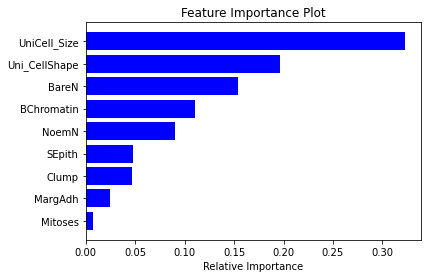

0.9693251533742331


In [4]:
import pandas as pd

df = pd.read_csv("/content/BreastCancer.csv")

dum_df = pd.get_dummies(df)
dum_df = dum_df.drop('Class_Benign', axis=1)

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X = dum_df.iloc[:,1:10]
y = dum_df.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

model_rf = RandomForestClassifier(random_state=1211,
                                  n_estimators=500,oob_score=True)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

##########################Feature Importance########################
for name, importance in zip(X.columns, model_rf.feature_importances_):
    print(name, "=", importance)

import numpy as np    
features = X.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#####################Out of Bag Error###############################
print(model_rf.oob_score_)


In [ ]:
############### Regressor###########


In [10]:
import pandas as pd

df = pd.read_csv("/content/Housing (2).csv")
dum_df = pd.get_dummies(df.iloc[:,1:11], drop_first=True)

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

X = dum_df
y = df.iloc[:,1]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018)

model_rf = RandomForestRegressor(random_state=1211)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1265.5356292682907
15.451585365853639
0.9996317069647893
